In [1]:
import umap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler

np.random.seed(402)

/home/ubuntu/miniconda3/envs/correlations/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# import global quantities from reconstructed graphs
r00 = np.load("/mnt/global_measures/kuramoto/K_0.0.npy", allow_pickle=True).item()
r10 = np.load("/mnt/global_measures/kuramoto/K_1.0.npy", allow_pickle=True).item()
r15 = np.load("/mnt/global_measures/kuramoto/K_1.5.npy", allow_pickle=True).item()
r25 = np.load("/mnt/global_measures/kuramoto/K_2.5.npy", allow_pickle=True).item()
r50 = np.load("/mnt/global_measures/kuramoto/K_5.0.npy", allow_pickle=True).item()

# import global quantities from original graphs
orig = np.load("/mnt/global_measures/kuramoto/K_original.npy", allow_pickle=True).item()

In [2]:
r00 = np.load("/mnt/global_measures/kuramoto.npy", allow_pickle=True).item()

In [9]:
r00['original']

{'N_100': {1: {'Mean_degree': 5.88,
   'MR_coefficient': 6.816326530612245,
   'Neigh_degree': 6.864930735930736,
   'Mixing_exponent': (-0.07891953875340785, 0.03444076388528521),
   'Global_clustering': (0.05789473684210526, 0.005247190093791128),
   'Assortativity': (nan, nan),
   'Modularity': 0.0,
   'Avg_path_length': 2.7725252525252526},
  2: {'Mean_degree': 5.62,
   'MR_coefficient': 6.5587188612099645,
   'Neigh_degree': 6.5332896825396825,
   'Mixing_exponent': (-0.005337232300168323, 0.02738063886680505),
   'Global_clustering': (0.051856594110115235, 0.005367198563434407),
   'Assortativity': (nan, nan),
   'Modularity': 0.0,
   'Avg_path_length': nan},
  3: {'Mean_degree': 6.52,
   'MR_coefficient': 7.211656441717793,
   'Neigh_degree': 7.2775454545454545,
   'Mixing_exponent': (-0.11297964093765175, 0.040048212495636816),
   'Global_clustering': (0.054814814814814816, 0.0046010094637729),
   'Assortativity': (nan, nan),
   'Modularity': 0.0,
   'Avg_path_length': 2.626464

In [15]:
import os

def build_dict():
    N_dict = {}
    for k in [0.0, 1.0, 1.5, 2.5, 5.0]:
        N_dict[f"K_{k}"] = {}
        for N in [100, 200, 500, 1000]:
            N_dict[f"K_{k}"][f"N_{N}"] = {}
            for i in range(1,26):
                N_dict[f"K_{k}"][f"N_{N}"][i] = {}
                N_dict[f"K_{k}"][f"N_{N}"][i]["Fisher"] = {}
                N_dict[f"K_{k}"][f"N_{N}"][i]["FisherRMT"] = {}
                N_dict[f"K_{k}"][f"N_{N}"][i]["Naive"] = {}
                N_dict[f"K_{k}"][f"N_{N}"][i]["NaiveRMT"] = {}
                for tau in ["tau1.0", "tau1.5", "tau2.0", "tau2.5"]:
                    N_dict[f"K_{k}"][f"N_{N}"][i]["Fisher"][tau] = {}
                    N_dict[f"K_{k}"][f"N_{N}"][i]["FisherRMT"][tau] = {}
                for p in ["p0.1", "p0.15", "p0.2", "p0.25"]:
                    N_dict[f"K_{k}"][f"N_{N}"][i]["Naive"][p] = {}
                    N_dict[f"K_{k}"][f"N_{N}"][i]["NaiveRMT"][p] = {}
    N_dict["original"] = {}
    for N in [100, 200, 500, 1000]:
        N_dict["original"][f"N_{N}"] = {}
        for i in range(1, 26):
            N_dict["original"][f"N_{N}"][i] = {}

    return N_dict

total_dict = build_dict()
for k in ["K_0.0", "K_1.0", "K_1.5", "K_2.5", "K_5.0"]:
    temp = np.load(f"/mnt/global_measures/{k}.npy", allow_pickle=True).item()
    total_dict[k] = temp[k]
    os.remove(f"/mnt/global_measures/{k}.npy")

temp = np.load("/mnt/global_measures/K_original.npy", allow_pickle=True).item()
total_dict['original'] = temp['original']
os.remove("/mnt/global_measures/K_original.npy")

file_path = 'mnt/global_measures/kuramoto.npy'
np.save(file_path, total_dict)

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/global_measures/K_0.0.npy'

In [10]:
total_dict

{'K_0.0': {'N_100': {1: {'Fisher': {'tau1.0': {'Mean_degree': 49.5,
      'MR_coefficient': 50.0,
      'Neigh_degree': 49.5,
      'Mixing_exponent': (1.0, 0.0),
      'Global_clustering': (0.98989898989899, 9.939765341108455e-05),
      'Assortativity': (1.0, 0.0),
      'Modularity': 0.1804978267523724,
      'Avg_path_length': nan},
     'tau1.5': {'Mean_degree': 49.5,
      'MR_coefficient': 50.0,
      'Neigh_degree': 49.5,
      'Mixing_exponent': (1.0, 0.0),
      'Global_clustering': (0.98989898989899, 9.939765341108455e-05),
      'Assortativity': (1.0, 0.0),
      'Modularity': 0.4207294765840221,
      'Avg_path_length': nan},
     'tau2.0': {'Mean_degree': 49.5,
      'MR_coefficient': 50.0,
      'Neigh_degree': 49.5,
      'Mixing_exponent': (1.0, 0.0),
      'Global_clustering': (0.98989898989899, 9.939765341108455e-05),
      'Assortativity': (1.0, 0.0),
      'Modularity': 0.48,
      'Avg_path_length': nan},
     'tau2.5': {'Mean_degree': 49.5,
      'MR_coefficient'

In [3]:
# function to make a unique dataframe from the results
def make_dataframe(original_dict, reconstructed_dict):
    n_nodes = list(reconstructed_dict.keys())
    idx = list(reconstructed_dict['N_100'].keys())
    methods = list(reconstructed_dict['N_100'][2].keys())
    taus = list(reconstructed_dict['N_100'][2]['Fisher'].keys())
    ps = list(reconstructed_dict['N_100'][2]['Naive'].keys())
    measures = list(reconstructed_dict['N_100'][2]['Fisher']['tau1.0'].keys())

    df = pd.DataFrame(columns=["N","idx","method","tau","p"])

    # insert column for global measures
    for m in measures:
        df.insert(len(list(df.columns)),m,None)
    
    for n in n_nodes:
        for i in idx:
            # add original values
            arr = [n,i,"original","-","-"]

            for m in measures:
                arr.append(original_dict[n][i][m])
            df.loc[len(df.index)] = arr

            for method in methods:
                if method in ["Naive","NaiveRMT"]:
                    for p in ps:
                        arr = [n,i,method,"-",p]
                        for m in measures:
                            arr.append(reconstructed_dict[n][i][method][p][m])
                        df.loc[len(df.index)] = arr
                else:
                    for tau in taus:
                        arr = [n,i,method,tau,"-"]
                        for m in measures:
                            arr.append(reconstructed_dict[n][i][method][tau][m])
                        df.loc[len(df.index)] = arr

    return df
                        
# Make the dataframes
df00 = make_dataframe(orig,r00).dropna()
df10 = make_dataframe(orig,r10).dropna()
df15 = make_dataframe(orig,r15).dropna()
df25 = make_dataframe(orig,r25).dropna()
df50 = make_dataframe(orig,r50).dropna()

# Drop the errors in the columns
df00["Mixing_exponent"] = [x[0] for x in df00["Mixing_exponent"].values]
df00["Global_clustering"] = [x[0] for x in df00["Global_clustering"].values]
df00["type"] = df00["method"] + df00["tau"] + df00["p"]

df10["Mixing_exponent"] = [x[0] for x in df10["Mixing_exponent"].values]
df10["Global_clustering"] = [x[0] for x in df10["Global_clustering"].values]
df10["type"] = df10["method"] + df10["tau"] + df10["p"]

df15["Mixing_exponent"] = [x[0] for x in df15["Mixing_exponent"].values]
df15["Global_clustering"] = [x[0] for x in df15["Global_clustering"].values]
df15["type"] = df15["method"] + df15["tau"] + df15["p"]

df25["Mixing_exponent"] = [x[0] for x in df25["Mixing_exponent"].values]
df25["Global_clustering"] = [x[0] for x in df25["Global_clustering"].values]
df25["type"] = df25["method"] + df25["tau"] + df25["p"]

df50["Mixing_exponent"] = [x[0] for x in df50["Mixing_exponent"].values]
df50["Global_clustering"] = [x[0] for x in df50["Global_clustering"].values]
df50["type"] = df50["method"] + df50["tau"] + df50["p"]

dataframes = [df00, df10, df15, df25, df50]

KeyError: 'Mixing_exponent'

In [19]:
def generate_umap_embedding(df):
    reducer = umap.UMAP()
    df_k = pd.concat([df, df[df["method"] == "original"]])
    df_k_data = df_k[
        [
            "Mean_degree",
            "MR_coefficient",
            "Neigh_degree",
            "Mixing_exponent",
            "Global_clustering",
            "Modularity",
            "Avg_path_length",
        ]
    ].values
    scaled_df_data = StandardScaler().fit_transform(df_k_data)
    embedding = reducer.fit_transform(scaled_df_data)

    features = np.unique(df["type"].values)
    maps = {v: i for i,v in enumerate(features)}
    numeric_labels = df_k["type"].map(maps)

    return embedding, numeric_labels

def create_palette():
    base_colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#9467bd", "#d62728"]

    # Generate shades for each base color
    palette = []
    for base in base_colors[:-1]:
        # Generate a gradient of 4 shades for each base color
        shades = sns.light_palette(base, n_colors=5, reverse=True)
        palette.extend(shades[:-1])
    palette.append(base_colors[-1])
    return palette

In [17]:
embeddings = []
numeric_labels_list = []
for df in dataframes:
    e, l = generate_umap_embedding(df)
    embeddings.append(e)
    numeric_labels_list.append(l)

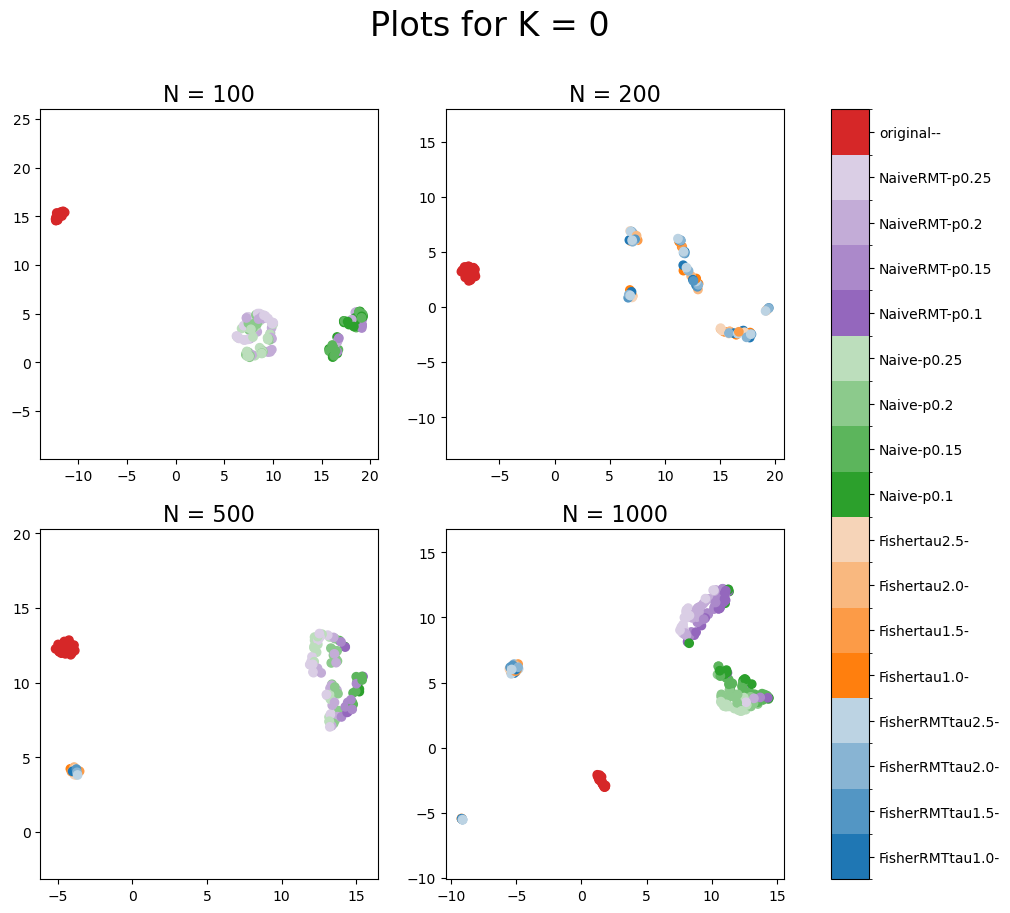

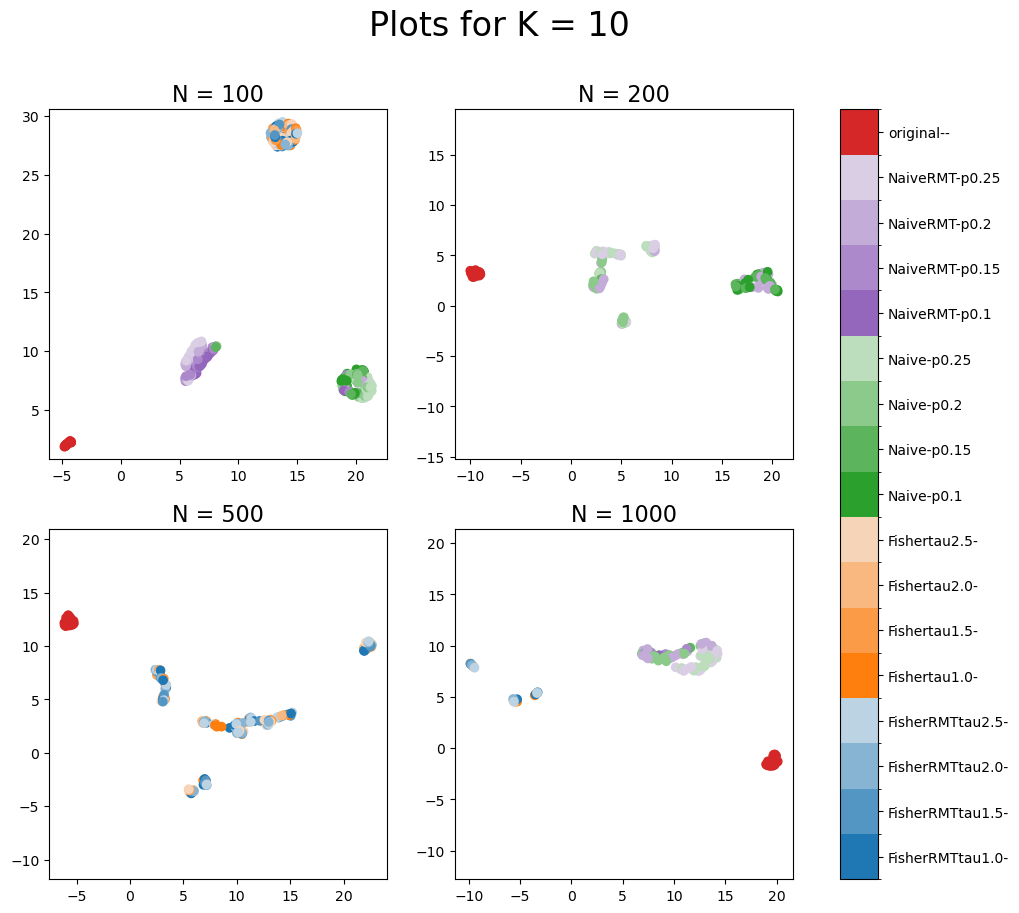

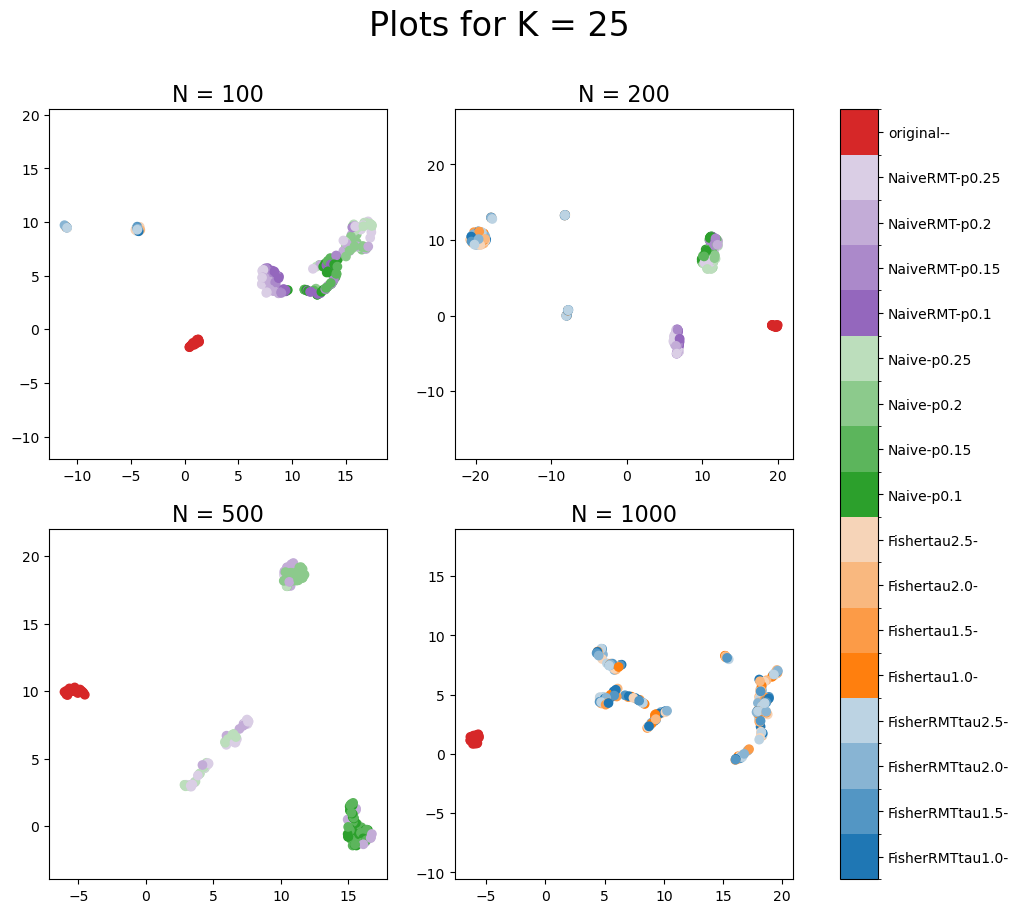

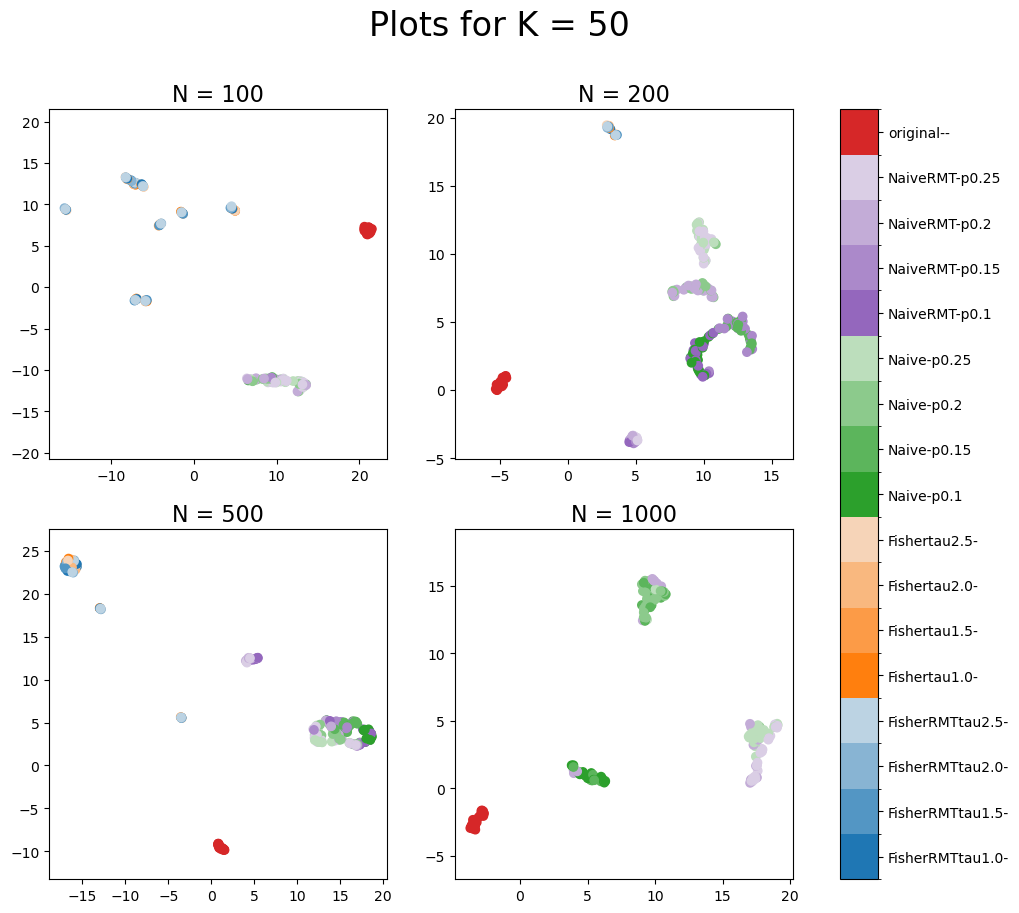

In [20]:
n_plots = len(embeddings)
palette = create_palette()

# Create a colormap from the custom palette
cmap = mcolors.ListedColormap(palette)

# Normalize feature values for color mapping
features = np.unique(df00["type"].values)
norm = mcolors.BoundaryNorm(boundaries=np.arange(len(features) + 1), ncolors=len(features))

N_list = [100, 200, 500, 1000]

emb_num = 0
values = [0.0, 1.0, 2.5, 5.0]
for val in values:
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle(f'Plots for K = {val}', fontsize=24)
    
    for i, ax in enumerate(axs.flat):
        embedding = embeddings[emb_num]
        
        # Scatter plot for each subplot
        scatter = ax.scatter(
            embedding[:, 0],
            embedding[:, 1],
            c=numeric_labels_list[emb_num],  # Use numeric labels for color mapping
            cmap=cmap,
            norm=norm
        )
        ax.set_aspect('equal', 'datalim')
        ax.set_title(f'N = {N_list[i]}', fontsize=16)

        emb_num += 1
    
    # Add a single colorbar for each figure
    fig.colorbar(scatter, ax=axs, orientation='vertical', ticks=np.arange(len(features)) + 0.5).ax.set_yticklabels(features)
    
    # plt.tight_layout()  # Adjust layout to fit title
    plt.show()